In [ ]:
import pandas as pd
import numpy as np

# Load your CSV data into a DataFrame
df = pd.read_csv('^SPX (2).csv')

# Determine the split index for 80% training and 20% testing
split_index = int(0.8 * len(df))

# Split the shuffled DataFrame into training and testing DataFrames
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Save training and testing DataFrames to separate CSV files
train_df.to_csv('SPX_train.csv', index=False)
test_df.to_csv('SPX_test.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('SPX_train.csv')

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2863, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,2863):
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose =2)

Epoch 1/20
88/88 - 23s - loss: 0.0076 - 23s/epoch - 256ms/step
Epoch 2/20
88/88 - 16s - loss: 0.0017 - 16s/epoch - 182ms/step
Epoch 3/20
88/88 - 15s - loss: 0.0015 - 15s/epoch - 170ms/step
Epoch 4/20
88/88 - 15s - loss: 0.0016 - 15s/epoch - 170ms/step
Epoch 5/20
88/88 - 15s - loss: 0.0014 - 15s/epoch - 170ms/step
Epoch 6/20
88/88 - 16s - loss: 0.0014 - 16s/epoch - 179ms/step
Epoch 7/20
88/88 - 15s - loss: 0.0011 - 15s/epoch - 173ms/step
Epoch 8/20
88/88 - 15s - loss: 0.0013 - 15s/epoch - 171ms/step
Epoch 9/20
88/88 - 15s - loss: 0.0011 - 15s/epoch - 171ms/step
Epoch 10/20
88/88 - 16s - loss: 0.0012 - 16s/epoch - 176ms/step
Epoch 11/20
88/88 - 15s - loss: 0.0011 - 15s/epoch - 176ms/step
Epoch 12/20
88/88 - 15s - loss: 0.0012 - 15s/epoch - 173ms/step
Epoch 13/20
88/88 - 15s - loss: 9.7901e-04 - 15s/epoch - 172ms/step
Epoch 14/20
88/88 - 16s - loss: 0.0010 - 16s/epoch - 177ms/step
Epoch 15/20
88/88 - 16s - loss: 9.3797e-04 - 16s/epoch - 178ms/step
Epoch 16/20
88/88 - 15s - loss: 8.5723e-0

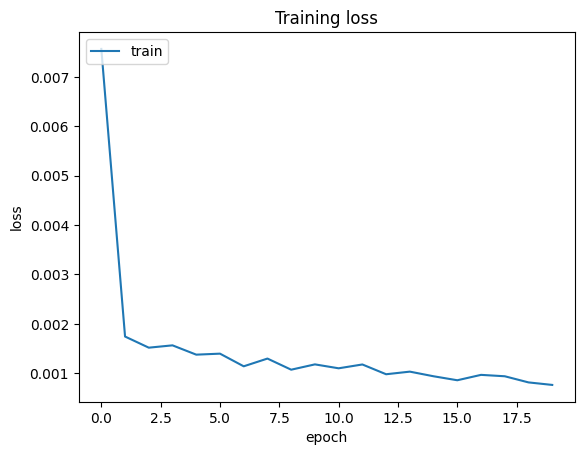

In [ ]:
#visualize training loss
plt.plot(hist.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('SPX_test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

#input array
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(656, 60, 1)

In [ ]:
y_pred = model.predict(X_test)

21/21 [==============================] - 3s 76ms/step


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

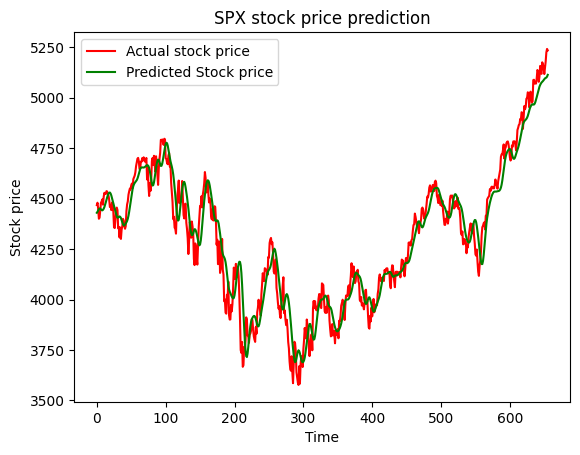

In [ ]:
plt.plot(y_test, color= 'red', label = 'Actual stock price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock price')
plt.title('SPX stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_price)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_price)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 72.25259474118712
Mean Squared Error (MSE): 8453.067730348259
Root Mean Squared Error (RMSE): 91.94056629338466
